In [1]:
!pip install fuzzy-c-means
!pip install geopandas

Data loaded: (339, 26)

=== Cluster Membership ===


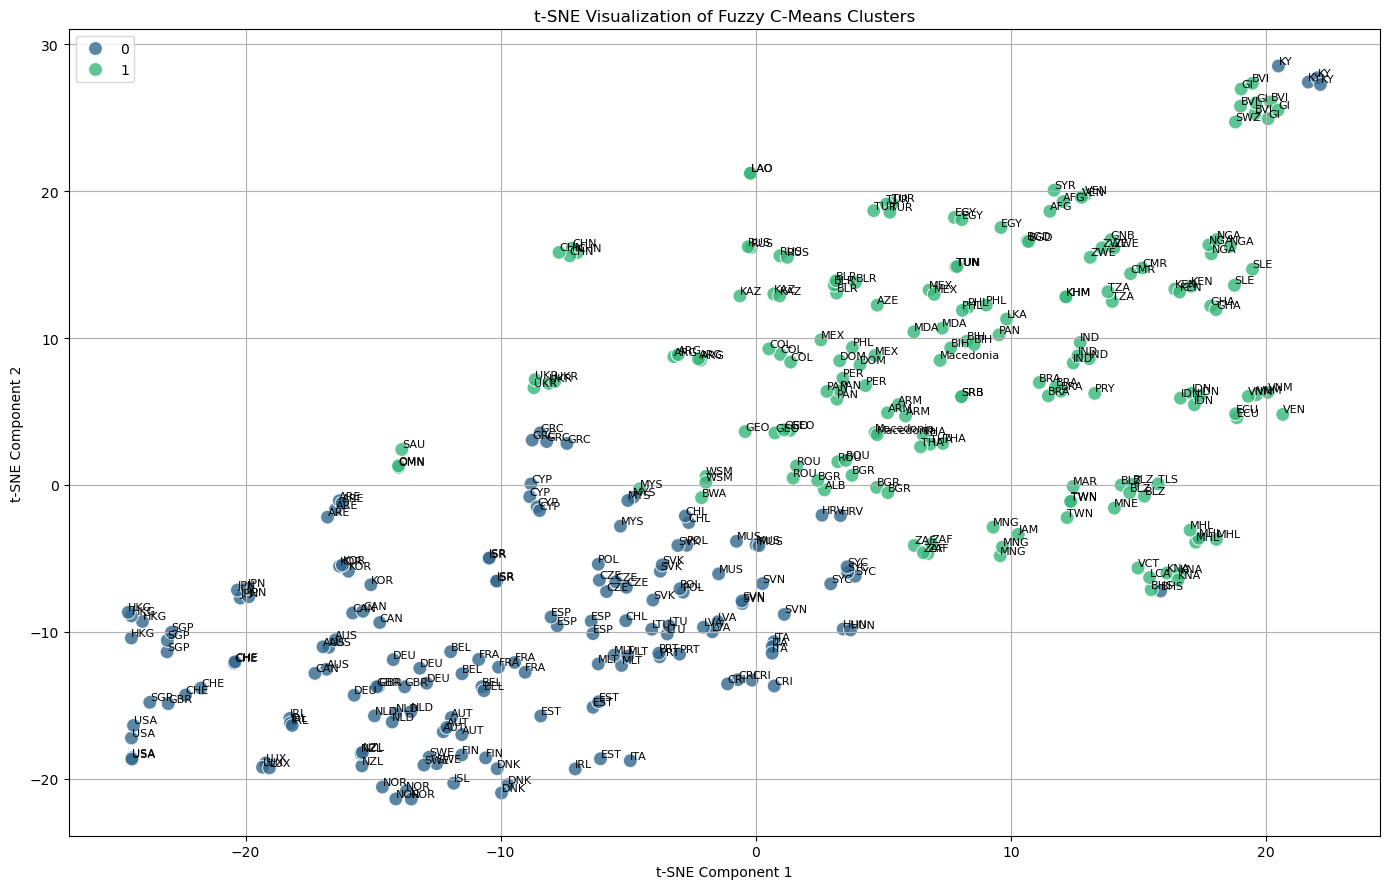

In [2]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from fcmeans import FCM
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Your provided function - unchanged
def csv2dictionary(file_path, key_col, value_col):
    df = pd.read_csv(file_path, sep=",")
    return dict(zip(df[key_col], df[value_col]))

# Configuration
TARGET_COLUMN = 'Country'
COUNTRY_CODES_FILE = 'data/country_codes.csv'
INPUT_FILE = 'data/ESG_0706_3.csv'
N_CLUSTERS = 2

# Load country code mapping
try:
    country_code_map = csv2dictionary(
        COUNTRY_CODES_FILE,
        key_col='Country',  # Match your CSV column names
        value_col='Code'
    )
except FileNotFoundError:
    print("Country code file not found - using full names")
    country_code_map = {}

# Load main data
try:
    df = pd.read_csv(INPUT_FILE, sep=" ")
    print(f"Data loaded: {df.shape}")
except FileNotFoundError:
    print(f"File {INPUT_FILE} not found")
    exit()

# Validate target column
if TARGET_COLUMN not in df.columns:
    raise ValueError(f"Column '{TARGET_COLUMN}' not found")

# Extract target values (country names)
country_names = df[TARGET_COLUMN].values

# Process numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns
X = df[numeric_cols].values

# Handle missing values
if np.isnan(X).any():
    X = np.nan_to_num(X, nan=np.nanmean(X, axis=0))

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering
fcm = FCM(n_clusters=N_CLUSTERS, random_state=42)
fcm.fit(X_scaled)
cluster_labels = np.argmax(fcm.u, axis=1)

# Cluster analysis
print("\n=== Cluster Membership ===")
clusters = {}
for idx, label in enumerate(cluster_labels):
    country = country_names[idx]
    code = country_code_map.get(country, country)  # Get code or keep name
    clusters.setdefault(label, []).append((country, code))


# Dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualization
plt.figure(figsize=(14, 9))

# Plot all points first
sns.scatterplot(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=cluster_labels,
    palette='viridis',
    s=100,
    alpha=0.8,
    legend='full'
)

# Add labels using country codes
for idx in range(len(X_tsne)):
    country = country_names[idx]
    code = country_code_map.get(country, country)
    plt.text(
        X_tsne[idx, 0],
        X_tsne[idx, 1],
        code,
        fontsize=8,
        ha='left',
        va='bottom'
    )

plt.title('t-SNE Visualization of Fuzzy C-Means Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from fcmeans import FCM
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots


# Configuration
TARGET_COLUMN = 'Country'
COUNTRY_CODES_FILE = 'data/country_codes.csv'
INPUT_FILE = 'data/ESG_0706_3.csv'
N_CLUSTERS = 2


In [5]:
def csv2dictionary(file_path, key_col, value_col):
    """
    Reads a CSV file and converts it into a dictionary.

    Parameters:
        file_path (str): Path to the CSV file.
        key_col (str): Name of the column to use as dictionary keys.
        value_col (str): Name of the column to use as dictionary values.

    Returns:
        dict: A dictionary created from the CSV file.
    """
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path, sep=",")
    
    # Convert the DataFrame to a dictionary
    result_dict = dict(zip(df[key_col], df[value_col]))

    return result_dict

In [6]:
# Load country code mapping
try:
    country_code_map = csv2dictionary(
        COUNTRY_CODES_FILE,
        key_col='Country',
        value_col='Code'
    )
except FileNotFoundError:
    print("Country code file not found - using full names")
    country_code_map = {}


In [7]:
# Load main data
try:
    df = pd.read_csv(INPUT_FILE, sep=" ")
    print(f"Data loaded: {df.shape}")
except FileNotFoundError:
    print(f"File {INPUT_FILE} not found")
    exit()

# Validate target column
if TARGET_COLUMN not in df.columns:
    raise ValueError(f"Column '{TARGET_COLUMN}' not found")

Data loaded: (339, 26)


In [8]:
# Extract target values (country names)
country_names = df[TARGET_COLUMN].values

In [9]:
# Process numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns
X = df[numeric_cols].values

# Handle missing values
if np.isnan(X).any():
    print("Filling missing values with column means")
    X = np.nan_to_num(X, nan=np.nanmean(X, axis=0))

In [10]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering
fcm = FCM(n_clusters=N_CLUSTERS, random_state=42)
fcm.fit(X_scaled)
cluster_labels = np.argmax(fcm.u, axis=1)

In [15]:
# Create cluster lists (before visualization)
clusters_dict = {}
for idx, label in enumerate(cluster_labels):
    country = country_names[idx]
    code = country_code_map.get(country, country)
    clusters_dict.setdefault(label, []).append((country, code))
print("Tamanho dos clausters: ")
print(len(set(clusters_dict[0])), len(set(clusters_dict[1])))

Tamanho dos clausters: 
46 68


In [16]:
# Dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Create visualization DataFrame
vis_df = pd.DataFrame({
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1],
    'Cluster': cluster_labels,
    'Country': country_names,
    'Raised': df['Raised']  # Add the "Raised" column from original data
})

# Map country names to codes in visualization data
vis_df['Country_Code'] = vis_df['Country'].map(country_code_map).fillna(vis_df['Country'])

Interactive visualization saved to 'clusters_visualization.html'


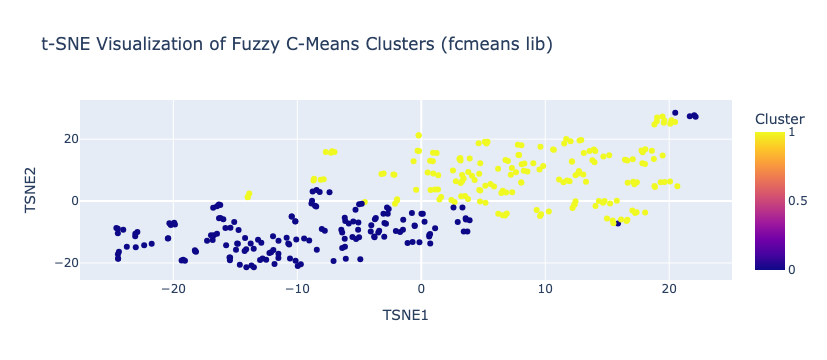

In [20]:
# Define custom colors for each cluster
cluster_colors = {
    "0": "blue",  # Color for Cluster 0
    "1": "red",   # Color for Cluster 1
    "2": "green", # Color for Cluster 2 (if you have more clusters)
    # Add more colors as needed
}

# Create interactive Plotly visualization
fig = px.scatter(
    vis_df,
    x='TSNE1',
    y='TSNE2',
    color='Cluster',
    hover_data={
        'Country_Code': True,
        'Raised': ':.2f',  # Format to 2 decimal places
        'TSNE1': False,
        'TSNE2': False,
        'Cluster': False
    },
    title='t-SNE Visualization of Fuzzy C-Means Clusters (fcmeans lib)'
)

# Update hover template
fig.update_traces(
    hovertemplate="<br>".join([
        "Country Code: %{customdata[0]}",
        "Raised: %{customdata[1]}",
    ]),
    customdata=vis_df[['Country_Code', 'Raised']].values
)

# Add cluster centers (optional)
# Note: TSNE doesn't support transforming cluster centers, so this is omitted

# Save and show interactive plot
fig.write_html("clusters_visualization.html")
print("Interactive visualization saved to 'clusters_visualization.html'")
fig.show()

In [227]:
# Step 3: Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

In [228]:
# New Step: Create cluster lists (before visualization)
clusters_dict = {}
country_names = data.iloc[:, 0]  # Assuming the first column contains country names

for idx, label in enumerate(cluster_membership):
    country = country_names[idx]
    code = country_codes.get(country, country)  # Use the country name if code is not found
    clusters_dict.setdefault(label, []).append((country, code))

In [229]:
# Print clusters for inspection
#for cluster_label, countries in clusters_dict.items():
#    print(f"Cluster {cluster_label}:")
#    for country, code in countries:
#        print(f"  {country} ({code})")
#    print()

In [230]:
# Step 4: Create a DataFrame for the t-SNE results and cluster assignments
results_df = pd.DataFrame({
    "Country": data.iloc[:, 0],  # Assuming the first column contains country names
    "TSNE-1": X_tsne[:, 0],
    "TSNE-2": X_tsne[:, 1],
    "Cluster": cluster_membership,
    "Raised": data["Raised"]  # Add the "Raised" column from the original data
})

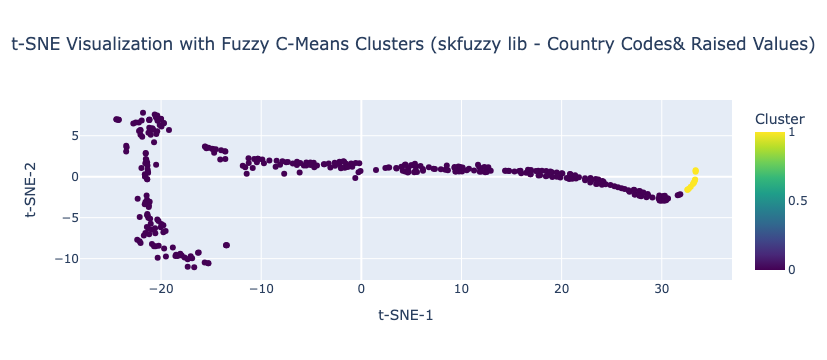

In [231]:
# Step 5: Add country codes to the DataFrame
results_df["Country Code"] = results_df["Country"].map(country_codes)


# Step 6: Visualize the clusters with Plotly
fig = px.scatter(results_df, x="TSNE-1", y="TSNE-2", color="Cluster",
                 hover_data=["Country Code", "Raised"],
                 title="t-SNE Visualization with Fuzzy C-Means Clusters (skfuzzy lib - Country Codes& Raised Values)",
                 labels={"TSNE-1": "t-SNE-1", "TSNE-2": "t-SNE-2", "Cluster": "Cluster"},
                 color_continuous_scale=px.colors.sequential.Viridis)

fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')),
                  selector=dict(mode='markers+text'))

fig.update_layout(legend_title_text='Cluster',
                  xaxis_title="t-SNE-1",
                  yaxis_title="t-SNE-2",
                  title_x=0.5)

fig.show()

In [232]:
##
## Version 2
##

In [233]:
# Step 1: Read the CSV files
file_path = "data/ESG_0706_3.csv"  # Replace with the correct path to your file
data = pd.read_csv(file_path, sep=" ")

code_path = "data/country_codes.csv"  # Replace with the correct path to your file
code_df = pd.read_csv(code_path, sep=",")

country_codes = csv2dictionary(code_path, 'Country', 'Code')

# Extract the data for clustering (all columns except the first)
X = data.iloc[:, 1:].values


In [234]:
# Step 2: Perform Fuzzy C-Means clustering
n_clusters = 2  # You can adjust this based on your data
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X.T, n_clusters, 2, error=0.005, maxiter=1000, init=None
)
cluster_membership = np.argmax(u, axis=0)

In [235]:
# Step 3: Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

In [236]:
# New Step: Create cluster lists (before visualization)
clusters_dict = {}
country_names = data.iloc[:, 0]  # Assuming the first column contains country names

for idx, label in enumerate(cluster_membership):
    country = country_names[idx]
    code = country_codes.get(country, country)  # Use the country name if code is not found
    clusters_dict.setdefault(label, []).append((country, code))

clusters_dict[1]


[('Afghanistan', 'AFG'),
 ('Afghanistan', 'AFG'),
 ('Albania', 'ALB'),
 ('Argentina', 'ARG'),
 ('Argentina', 'ARG'),
 ('Argentina', 'ARG'),
 ('Argentina', 'ARG'),
 ('Armenia', 'ARM'),
 ('Armenia', 'ARM'),
 ('Armenia', 'ARM'),
 ('Australia', 'AUS'),
 ('Australia', 'AUS'),
 ('Australia', 'AUS'),
 ('Australia', 'AUS'),
 ('Austria', 'AUT'),
 ('Austria', 'AUT'),
 ('Austria', 'AUT'),
 ('Austria', 'AUT'),
 ('Azerbaijan', 'AZE'),
 ('The Bahamas', 'BHS'),
 ('The Bahamas', 'BHS'),
 ('Bangladesh', 'BGD'),
 ('Bangladesh', 'BGD'),
 ('Belarus', 'BLR'),
 ('Belarus', 'BLR'),
 ('Belarus', 'BLR'),
 ('Belarus', 'BLR'),
 ('Belgium', 'BEL'),
 ('Belgium', 'BEL'),
 ('Belgium', 'BEL'),
 ('Belgium', 'BEL'),
 ('Belize', 'BLZ'),
 ('Belize', 'BLZ'),
 ('Belize', 'BLZ'),
 ('Belize', 'BLZ'),
 ('Bosnia and Herzegovina', 'BIH'),
 ('Bosnia and Herzegovina', 'BIH'),
 ('Bosnia and Herzegovina', 'BIH'),
 ('Botswana', 'BWA'),
 ('Brazil', 'BRA'),
 ('Brazil', 'BRA'),
 ('Brazil', 'BRA'),
 ('Brazil', 'BRA'),
 ('British Virgin 

In [237]:
# Step 4: Create a DataFrame for the t-SNE results and cluster assignments
results_df = pd.DataFrame({
    "Country": country_names,
    "TSNE-1": X_tsne[:, 0],
    "TSNE-2": X_tsne[:, 1],
    "Cluster": cluster_membership,
    "Raised": data["Raised"]  # Add the "Raised" column from the original data
})

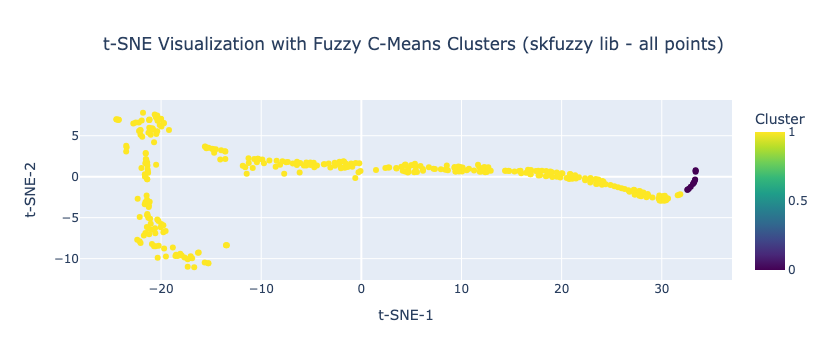

In [238]:
# Step 5: Add country codes to the DataFrame
results_df["Country Code"] = results_df["Country"].map(country_codes)

# Ensure the "Cluster" column is treated as categorical
aggregated_df["Cluster"] = aggregated_df["Cluster"].astype(str)

# Define custom colors for each cluster
cluster_colors = {
    "0": "blue",  # Color for Cluster 0
    "1": "red",   # Color for Cluster 1
    "2": "green", # Color for Cluster 2 (if you have more clusters)
    # Add more colors as needed
}

# Step 6: Original Plotting (with repeated points)
fig_original = px.scatter(results_df, x="TSNE-1", y="TSNE-2", color="Cluster",
                          hover_data=["Country Code", "Raised"],
                          title="t-SNE Visualization with Fuzzy C-Means Clusters (skfuzzy lib - all points)",
                          labels={"TSNE-1": "t-SNE-1", "TSNE-2": "t-SNE-2", "Cluster": "Cluster"},
                          color_continuous_scale=px.colors.sequential.Viridis)

fig_original.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')),
                           selector=dict(mode='markers+text'))

fig_original.update_layout(legend_title_text='Cluster',
                           xaxis_title="t-SNE-1",
                           yaxis_title="t-SNE-2",
                           title_x=0.5)

fig_original.show()


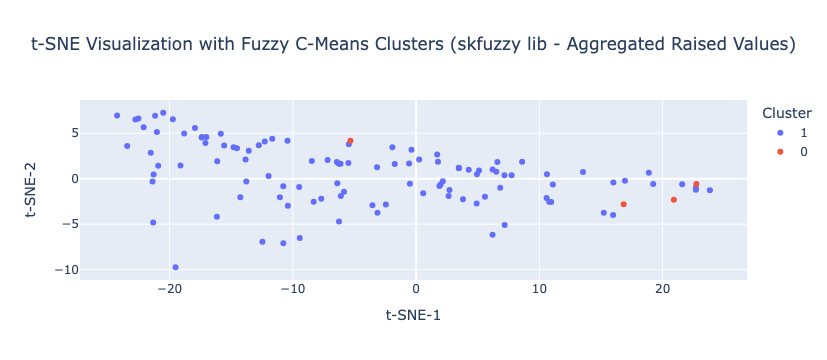

In [239]:

# Step 7: Aggregated Plotting (no repeated points, summed "Raised" values)
# Group by country and aggregate "Raised" values
aggregated_df = results_df.groupby("Country", as_index=False).agg({
    "TSNE-1": "mean",  # Use mean for t-SNE coordinates
    "TSNE-2": "mean",
    "Cluster": "first",  # Use the first cluster label for the country
    "Raised": "sum",  # Sum the "Raised" values for repeated countries
    "Country Code": "first"  # Use the first country code for the country
})

# Ensure the "Cluster" column is treated as categorical
aggregated_df["Cluster"] = aggregated_df["Cluster"].astype(str)

# Define custom colors for each cluster
cluster_colors = {
    "0": "blue",  # Color for Cluster 0
    "1": "red",   # Color for Cluster 1
    "2": "green", # Color for Cluster 2 (if you have more clusters)
    # Add more colors as needed
}

# Visualize the clusters with Plotly
fig_aggregated = px.scatter(aggregated_df, x="TSNE-1", y="TSNE-2", color="Cluster",
                            hover_data=["Country Code", "Raised"],
                            title="t-SNE Visualization with Fuzzy C-Means Clusters (skfuzzy lib - Aggregated Raised Values)",
                            labels={"TSNE-1": "t-SNE-1", "TSNE-2": "t-SNE-2", "Cluster": "Cluster"},
                            color_continuous_scale=px.colors.sequential.Viridis)

fig_aggregated.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')),
                             selector=dict(mode='markers+text'))

fig_aggregated.update_layout(legend_title_text='Cluster',
                             xaxis_title="t-SNE-1",
                             yaxis_title="t-SNE-2",
                             title_x=0.5)

fig_aggregated.show()

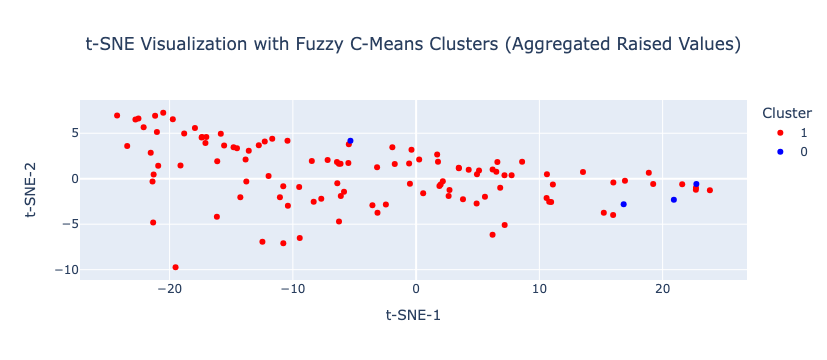

In [240]:
# Step 7: Aggregated Plotting (no repeated points, summed "Raised" values)
# Group by country and aggregate "Raised" values
aggregated_df = results_df.groupby("Country", as_index=False).agg({
    "TSNE-1": "mean",  # Use mean for t-SNE coordinates
    "TSNE-2": "mean",
    "Cluster": "first",  # Use the first cluster label for the country
    "Raised": "sum",  # Sum the "Raised" values for repeated countries
    "Country Code": "first"  # Use the first country code for the country
})

# Ensure the "Cluster" column is treated as categorical
aggregated_df["Cluster"] = aggregated_df["Cluster"].astype(str)

# Define custom colors for each cluster
cluster_colors = {
    "0": "blue",  # Color for Cluster 0
    "1": "red",   # Color for Cluster 1
    "2": "green", # Color for Cluster 2 (if you have more clusters)
    # Add more colors as needed
}

# Visualize the clusters with Plotly
fig_aggregated = px.scatter(aggregated_df, x="TSNE-1", y="TSNE-2", color="Cluster",
                            color_discrete_map=cluster_colors,  # Use custom colors
                            hover_data=["Country Code", "Raised"],
                            title="t-SNE Visualization with Fuzzy C-Means Clusters (Aggregated Raised Values)",
                            labels={"TSNE-1": "t-SNE-1", "TSNE-2": "t-SNE-2", "Cluster": "Cluster"})

fig_aggregated.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')),
                             selector=dict(mode='markers+text'))

fig_aggregated.update_layout(legend_title_text='Cluster',
                             xaxis_title="t-SNE-1",
                             yaxis_title="t-SNE-2",
                             title_x=0.5)

fig_aggregated.show()